# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Basics I
> **pandas** is a *fast, powerful, flexible and easy* to use open source data analysis and manipulation tool, built on top of the Python programming language

> **pandas 개요**
> - *고수준의 자료구조* 와 파이썬을 통한 통한 *빠르고 쉬운 데이터 분석도구* 를 포함하는 라이브러리
> - *NumPy 기반에서 개발* 되었다.
> - *Series와 DataFrame은 로컬 네임스페이스로 import* 하는 것이 훨씬 편하다.

In [1]:
# Pandas Basics
from images import bigpycraft_bda as bpc
from IPython.display import Image 

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## 1. Introduction to pandas data structures
> **pandas 자료 구조 소개**
> - *Series* 와 *DataFrame* 이 두가지 자료구조에 대해 익숙해지도록 하자.
> - 이 두가지 자료구조가 모든 문제를 해결할 수는 없지만, 대부분의 애플리케이션에서 사용하기 쉽고 탄탄한 기반을 제공한다.

### <font color='brown'>Series</font>
> 
> - Series는 일련의 객체를 담을 수 있는 1차원 배열 같은 자료 구조
> - Index라고 하는 배열의 데이터에 연관된 이름을 가지고 있다.

In [2]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [5]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [7]:
obj2['a']

-5

In [8]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [9]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [10]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [11]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [12]:
'b' in obj2

True

In [13]:
'e' in obj2

False

In [14]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [15]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [16]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [17]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [18]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [19]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [20]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [21]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [22]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [23]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [24]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### <font color='brown'>DataFrame</font>
> 
> - 표 같은 스프레드시트 형식의 자료구조로 여러개의 칼럼을 가진다.
> - 각 칼럼은 서로 다른 종류의 값(숫자, 문자, 불리언 등)을 담을 수 있다.
> - 로우와 칼럼에 대한 Index가 있는데, Index의 모양이 같은 Series 객체를 담고 있는 파이썬 사전으로 생각하자.
> - <font color='green'>Dataframe은 데이터를 내부적으로 2차원 형식으로 저장</font>
> - 고차원의 표 형식 데이터를 계층적 색인(Hierarchical Indexing)을 통해 쉽게 표현할 수 있다. 

In [25]:
# DataFrame 객체 생성1
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2002],
        'pop'  : [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)

In [26]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [27]:
# 순서를 지정
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [28]:
# DataFrame 객체 생성2
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [29]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [30]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [31]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [32]:
# 로우는 위치나 ix 메소드를 통해 접근
frame2.ix['three']

C:\Python\Anaconda3-50\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [33]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [34]:
frame2.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [35]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [36]:
frame2['debt'] = np.arange(5.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


In [37]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [38]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [39]:
# 칼럼을 삭제
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [40]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


<font color='blue'>
[Tip] DataFrame의 색인을 이용해서 생성된 칼럼은 내부 데이터에 대한 뷰(View)이며 복사가 이루어지지 않는다.
> 
- 이렇게 얻은 Series 객체에 대한 변경은 실제 DataFrame에 반영된다.
- 복사본이 필요할 때는 Series의 copy 메소드를 이용


In [41]:
# DataFrame 객체 생성3  
# 중첩된 dict, 바깥 사전의 키값이 칼럼이 되고 안의 키는 로우가 된다.
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio'  : {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = DataFrame(pop)

In [42]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [43]:
# NumPy에서 처럼 결과값의 순서 뒤집기
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [44]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [45]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [46]:
pdata = {'Ohio'  : frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


In [47]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [48]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [49]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7]], dtype=object)

In [50]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


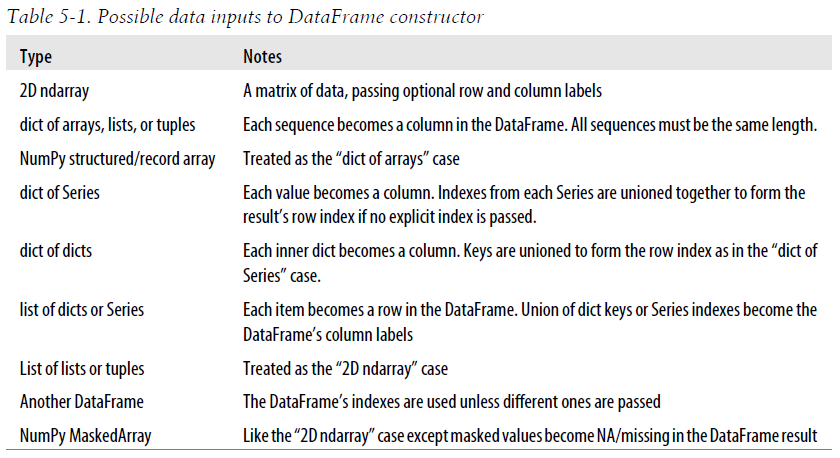

In [51]:
# DataFrame 생성자에서 사용 가능한 입력 데이터 
Image(bpc.Table5_1)

### <font color='brown'>Index objects</font>
> pandas의 색인 객체
- 표 형식의 데이터에서 각 로우와 칼럼에 대한 이름과 다른 메타데이터(축의 이름 등)을 저장하는 객체
- Series나 DataFrame 객체를 생성할 때 사용되는 배열이나 혹은 다른 순차적인 이름은 내부적으로 색인으로 변환
- 색인 객체는 변경할 수 없다. 그래서~~~ 자료구조사이에서 안전하게 공유될 수 있다.^^

In [52]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [53]:
index[1:]

Index(['b', 'c'], dtype='object')

In [54]:
# 색인객체 변경시 TypeError 발생!!
# index[1] = 'd'

In [55]:
index = pd.Index(np.arange(3))
obj2 = Series([1.5, -2.5, 0], index=index)
obj2.index is index

True

In [56]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [57]:
'Ohio' in frame3.columns

True

In [58]:
2003 in frame3.index

False

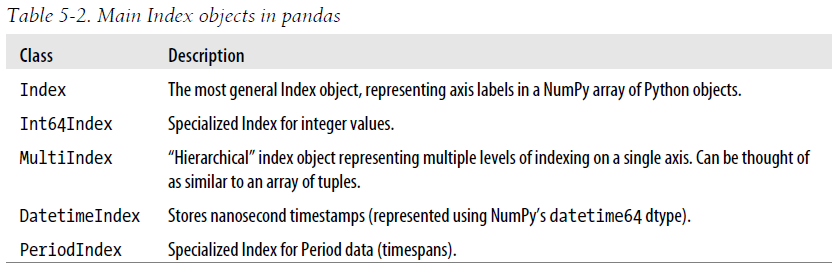

In [59]:
# pandas의 주요 Index 객체
Image(bpc.Table5_2)

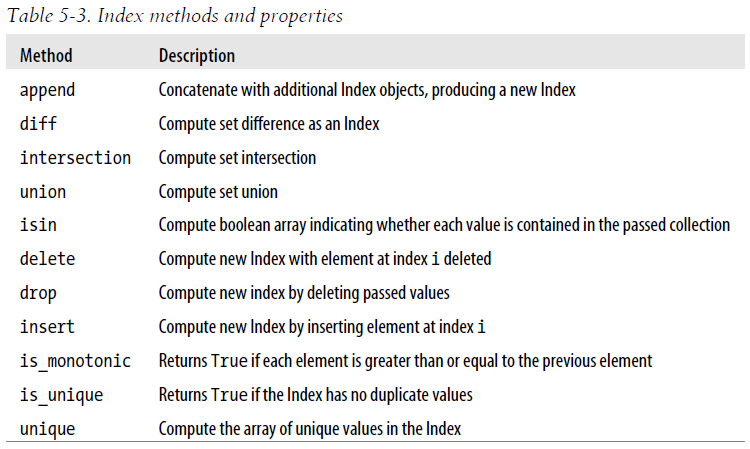

In [60]:
# Index 메소드와 속성
Image(bpc.Table5_3)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>